### Analysis & Dataset Overview

The number of Islamic boarding schools in Indonesia is represented in this brief analysis. 

This information was obtained from the Ministry of Religion Affairs official website.

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

#### Import dataset

In [2]:
df = pd.read_excel("Cleaning_Pesantren.xls")

In [3]:
df.head()

,Provinsi,Kabupaten,Pesantren,Tipe pesantren Satuan pendidikan,Tipe pesantren Penyelenggara satuan pendidikan,Jumlah santri Mukim,Jumlah santri Tidak mukim
0,ACEH,Aceh Selatan,42,33,9,7224,3329
1,ACEH,Aceh Tenggara,34,1,33,5395,1350
2,ACEH,Aceh Timur,82,65,17,7137,3268
3,ACEH,Aceh Tengah,19,3,16,1478,1241
4,ACEH,Aceh Barat,37,21,16,5069,1260


In [4]:
df.shape

(448, 7)

In [5]:
df.isnull().sum()

Provinsi                                          0
Kabupaten                                         0
Pesantren                                         0
Tipe pesantren Satuan pendidikan                  0
Tipe pesantren Penyelenggara satuan pendidikan    0
Jumlah santri Mukim                               0
Jumlah santri Tidak mukim                         0
dtype: int64

#### Import libraries for visualization

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
sns.set()

In [9]:
pesantren_per_provinsi = pd.crosstab(index = df["Provinsi"], columns = "Number of Pesantren", values = df["Pesantren"], aggfunc = "sum").sort_values("Number of Pesantren", ascending = False)
pesantren_per_provinsi.head(10)

col_0,Number of Pesantren
Provinsi,
JAWA BARAT,8343
BANTEN,4579
JAWA TIMUR,4452
JAWA TENGAH,3787
ACEH,1177
NTB,684
LAMPUNG,677
DI YOGYAKARTA,319
SUMATERA SELATAN,317


In [10]:
pesantren_per_kota = pd.crosstab(index = df["Kabupaten"], columns = "Number of Pesantren", values = df["Pesantren"], aggfunc = "sum").sort_values("Number of Pesantren", ascending = False).head(20)
pesantren_per_kota

col_0,Number of Pesantren
Kabupaten,
Lebak,1593
Tasikmalaya,1318
Pandeglang,1168
Bogor,1060
Garut,1030
Serang,1023
Cirebon,725
Sukabumi,629
Jember,611


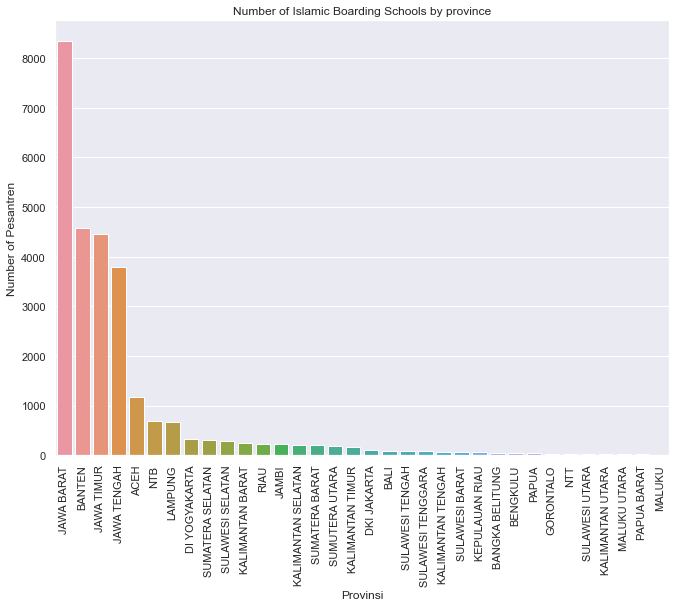

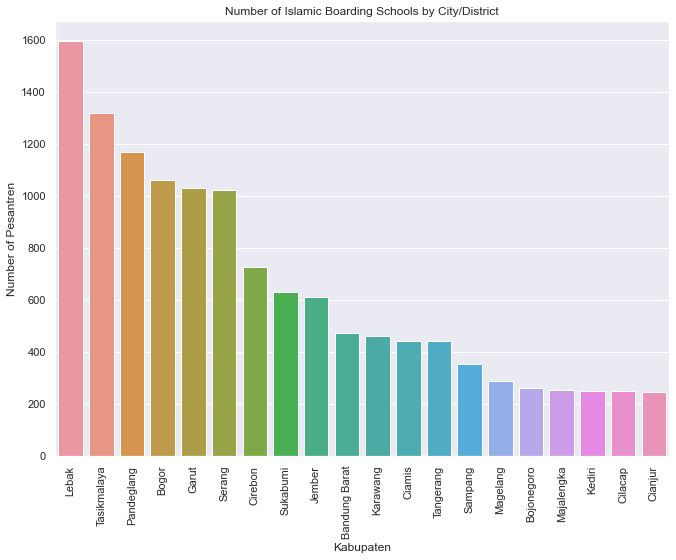

In [12]:
pesantren_per_provinsi = pesantren_per_provinsi.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Provinsi",
           y = "Number of Pesantren",
           data = pesantren_per_provinsi)
plt.xticks(rotation = 90)
plt.title("Number of Islamic Boarding Schools by province")


pesantren_per_kota = pesantren_per_kota.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Kabupaten",
           y = "Number of Pesantren",
           data = pesantren_per_kota)
plt.xticks(rotation = 90)
plt.title("Number of Islamic Boarding Schools by City/District")

plt.savefig("pesantren_per_provinsi.png")
plt.savefig("pesantren_per_kota")
plt.show()

- According to the barplot above, the province of West Java has the greatest number of Islamic boarding schools. It is nearly twice as many as the number of pesantren in second place, Banten.
- However, when looking at the number of pesantren by city/regency, the two cities in Banten that have the most pesantren are Lebak and Pandeglang.

In [13]:
# Membuat kolom baru (Jumlah santri)

df["Jumlah Santri"] = df["Jumlah santri Mukim"] + df["Jumlah santri Tidak mukim"]

In [14]:
df.head()

,Provinsi,Kabupaten,Pesantren,Tipe pesantren Satuan pendidikan,Tipe pesantren Penyelenggara satuan pendidikan,Jumlah santri Mukim,Jumlah santri Tidak mukim,Jumlah Santri
0,ACEH,Aceh Selatan,42,33,9,7224,3329,10553
1,ACEH,Aceh Tenggara,34,1,33,5395,1350,6745
2,ACEH,Aceh Timur,82,65,17,7137,3268,10405
3,ACEH,Aceh Tengah,19,3,16,1478,1241,2719
4,ACEH,Aceh Barat,37,21,16,5069,1260,6329


In [16]:
santri_per_provinsi = pd.crosstab(index = df["Provinsi"], columns = "Number of Santri", values = df["Jumlah Santri"], aggfunc = "sum").sort_values("Number of Santri", ascending = False)
santri_per_provinsi.head(10)

col_0,Number of Santri
Provinsi,
JAWA TIMUR,761717
JAWA BARAT,604613
JAWA TENGAH,448395
NTB,273711
ACEH,220096
BANTEN,208037
LAMPUNG,82483
SULAWESI SELATAN,81178
KALIMANTAN SELATAN,78084


In [17]:
santri_per_kota = pd.crosstab(index = df["Kabupaten"], columns = "Number of santri", values = df["Jumlah Santri"], aggfunc = "sum").sort_values("Number of santri", ascending = False).head(20)
santri_per_kota.head(10)

col_0,Number of santri
Kabupaten,
Lombok Timur,98807
Bogor,85366
Tasikmalaya,84901
Lombok Tengah,81460
Lamongan,66852
Garut,66041
Kediri,64710
Pandeglang,61009
Pamekasan,55001


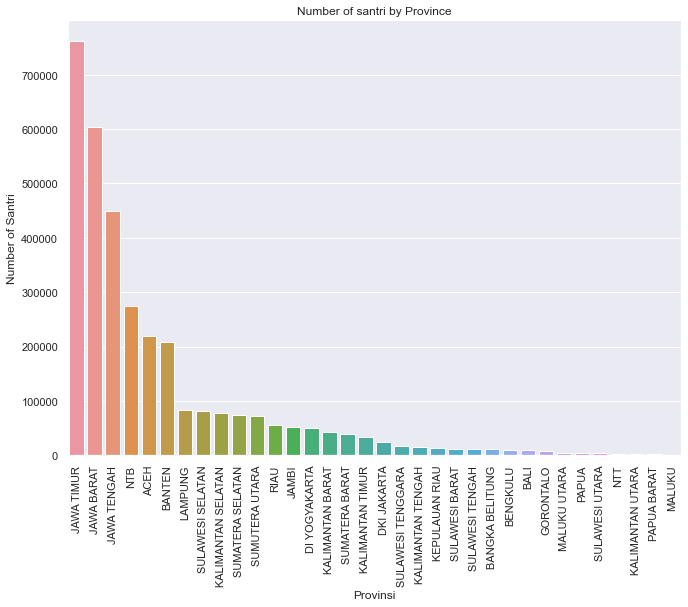

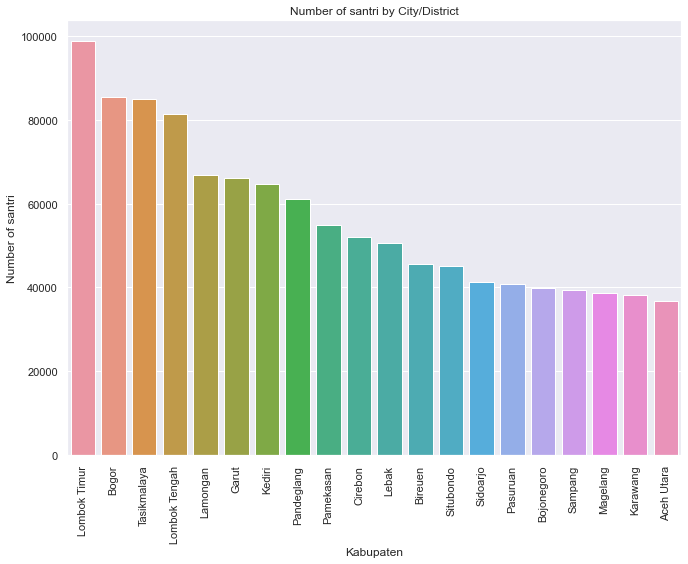

In [19]:
# visualization data for the number of santri in each province

santri_per_provinsi = santri_per_provinsi.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Provinsi",
           y = "Number of Santri",
           data = santri_per_provinsi)
plt.xticks(rotation = 90)
plt.title("Number of santri by Province")

# visualization data for the number of santri in each city
santri_per_kota = santri_per_kota.reset_index()
plt.figure(figsize = (11,8))
sns.barplot(x = "Kabupaten",
           y = "Number of santri",
           data = santri_per_kota)
plt.xticks(rotation = 90)
plt.title("Number of santri by City/District")

plt.savefig("santri_per_provinsi")
plt.savefig("santri_per_kota")
plt.show()

According to this, the provinces of East Java, West Java, and Central Java have the highest number of students. However, when grouped by city, the top three are East Lombok, Bogor, and Tasikmalaya.